In [ ]:
"""
Clean move_data_general_all for simple EDA

"""

In [17]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data and clean up columns

In [13]:
# Load the cleaned complete data
all_df = pd.read_pickle('../data/movie_data_general_all')

# Clean up columns
# Convert unit of 'opening_weekend_usa' to million dollors
all_df['opening_weekend_usa'] = all_df['opening_weekend_usa']/1e6

# Add release_year
all_df['release_year'] = all_df['release_date'].dt.year

# Rename and drop duplicated movies
all_df.rename(columns={'certificate':'MPAA'},inplace=True)
all_df.drop_duplicates(subset=['movie_title','release_year'],inplace=True)

# Remove outliers
all_df = all_df[all_df.budget < 500e6]
all_df = all_df[all_df.opening_weekend_usa < 100]
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 3 to 5098
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   movie_title          5125 non-null   object        
 1   rating               5125 non-null   float64       
 2   vote                 5125 non-null   float64       
 3   MPAA                 5125 non-null   object        
 4   genre                5125 non-null   object        
 5   release_date         5125 non-null   datetime64[ns]
 6   metascore            1703 non-null   float64       
 7   keywords             5125 non-null   object        
 8   budget               5125 non-null   float64       
 9   opening_weekend_usa  5125 non-null   float64       
 10  gross_usa            5125 non-null   float64       
 11  gross_world          5125 non-null   float64       
 12  runtime              5113 non-null   float64       
 13  distributor          5125 non-nul

In [14]:
all_df.describe()

,rating,vote,metascore,budget,opening_weekend_usa,gross_usa,gross_world,runtime,release_year
count,5125.000000,5.125000e+03,1703.000000,5.125000e+03,5125.000000,5.125000e+03,5.125000e+03,5113.000000,5125.000000
mean,6.375005,1.117524e+05,72.330593,3.553518e+07,11.458838,4.639196e+07,9.671627e+07,108.613730,2002.827512
std,0.965973,1.753826e+05,8.937401,3.877352e+07,15.016762,5.810914e+07,1.554766e+08,19.727011,11.479435
min,1.400000,1.730000e+02,61.000000,2.000000e+01,0.000162,3.090000e+02,3.090000e+02,37.000000,1931.000000
25%,5.800000,2.008300e+04,65.000000,1.000000e+07,0.992087,9.176000e+06,1.259127e+07,95.000000,1995.000000
50%,6.400000,5.218400e+04,70.000000,2.200000e+07,6.513130,2.701118e+07,4.019407e+07,105.000000,2004.000000
75%,7.000000,1.262430e+05,78.000000,4.500000e+07,14.953664,6.007950e+07,1.141786e+08,118.000000,2012.000000
max,9.300000,2.337357e+06,100.000000,3.000000e+08,98.786705,7.605076e+08,2.790439e+09,330.000000,2020.000000


In [23]:
# Save cleaned data
all_df.to_pickle('../data/movie_data_general_cleaned')

In [18]:
# Find top 100 actors
all_df_actor = all_df['star'].str.join(sep='*').str.get_dummies(sep='*')
actor_list = (all_df_actor.sum()).sort_values(ascending=False).index.tolist()[:100]
# actor_list
with open('../dump/actor_top100_list', 'wb') as f:
    pickle.dump(actor_list, f)

### Separate columns into target candidates, continuous features, categorical features

In [19]:
con_feature = ['budget','runtime','release_year']
cat_feature = ['MPAA','genre','distributor','language','country','keywords']
target_candidate = ['opening_weekend_usa','gross_usa','gross_world','rating','vote']

In [20]:
# Choose only the continuous variables for now
c_movie_df = all_df[['opening_weekend_usa'] + con_feature].copy()

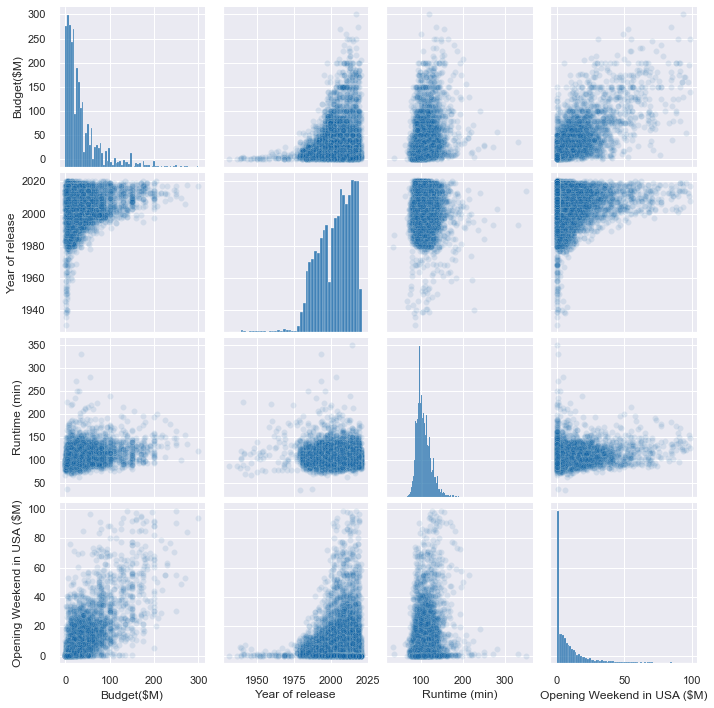

In [586]:
# Check pairplot
# sns.pairplot(c_movie_df[['budget','release_year','runtime','opening_weekend_usa']],plot_kws=dict(alpha=.1))

scatter_df = all_df[['budget','release_year','runtime','opening_weekend_usa']].copy()
scatter_df['budget'] = scatter_df['budget']/1e6
scatter_df.rename(columns={'budget': 'Budget($M)', 'release_year':'Year of release', 'runtime':'Runtime (min)',\
'opening_weekend_usa': 'Opening Weekend in USA ($M)'},inplace=True)
fig = sns.pairplot(scatter_df,plot_kws=dict(alpha=.1))

plt.show()

In [587]:
fig.savefig('../plot/pairplot.pdf', bbox_inches='tight', transparent = True)

In [25]:
all_df = pd.read_pickle('../data/movie_data_general_cleaned')
all_df.distributor

3                          WarnerBros.
6                     ColumbiaPictures
16                            STXFilms
23                           Lionsgate
25                  RedGranitePictures
                     ...              
5081         SidneyKimmelEntertainment
5085                   EferProductions
5087               PointParkUniversity
5094    ChristopherColumbusProductions
5098                     OrionPictures
Name: distributor, Length: 5125, dtype: object